In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip

In [ ]:
import sys
!{sys.executable} -m pip install -U pandas-profiling[notebook]
!jupyter nbextension enable --py widgetsnbextension

In [ ]:
!pip install pandas-profiling

In [35]:
import pandas_profiling
import matplotlib.pyplot as plt
import seaborn as sns
from pandas_profiling.utils.cache import cache_file
import pandas as pd
from pandas_profiling import ProfileReport
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
df = pd.read_csv("breast-cancer.data", sep=",", header=None,names=['Class','age','menopause','tumor-size','inv-nodes','node-caps','deg-malig','breast','breast-quad','irradiat'])
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,no-recurrence-events,30-39,premeno,30-34,0-2,no,3,left,left_low,no
1,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,right,right_up,no
2,no-recurrence-events,40-49,premeno,20-24,0-2,no,2,left,left_low,no
3,no-recurrence-events,60-69,ge40,15-19,0-2,no,2,right,left_up,no
4,no-recurrence-events,40-49,premeno,0-4,0-2,no,2,right,right_low,no


In [17]:
import pandas_profiling
from pandas_profiling import ProfileReport
from pandas_profiling.utils.cache import cache_file
profile= ProfileReport(df,html={'style':{"full_width":True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

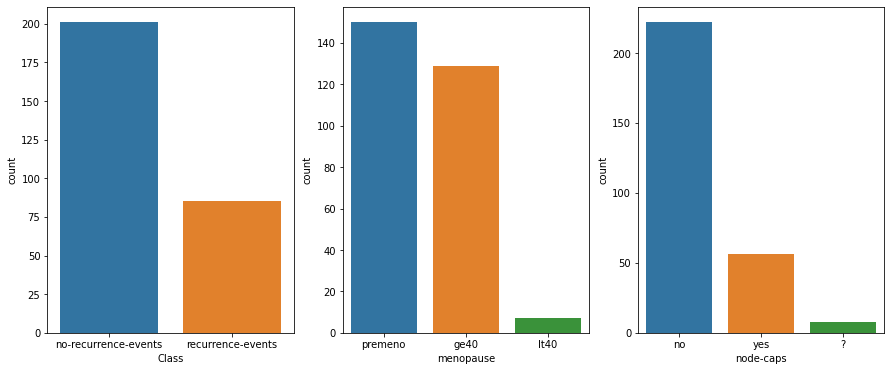

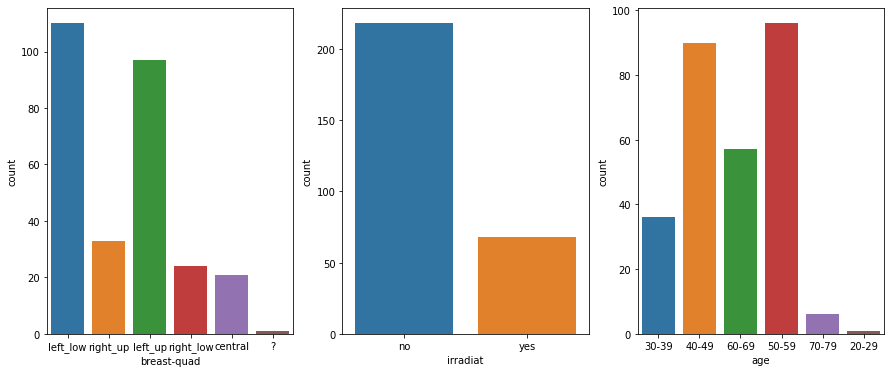

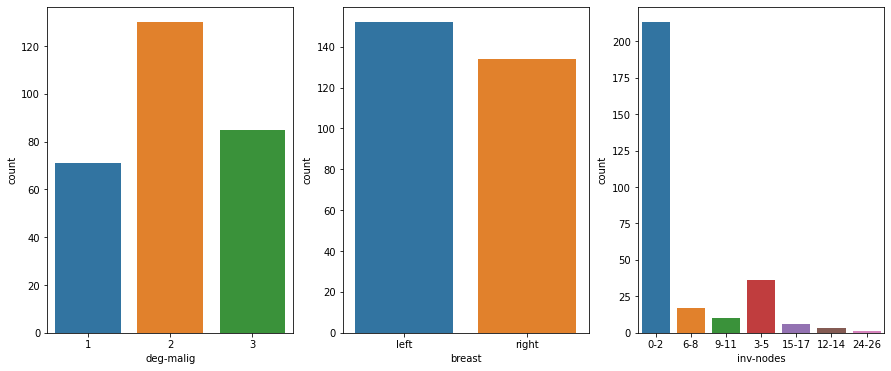

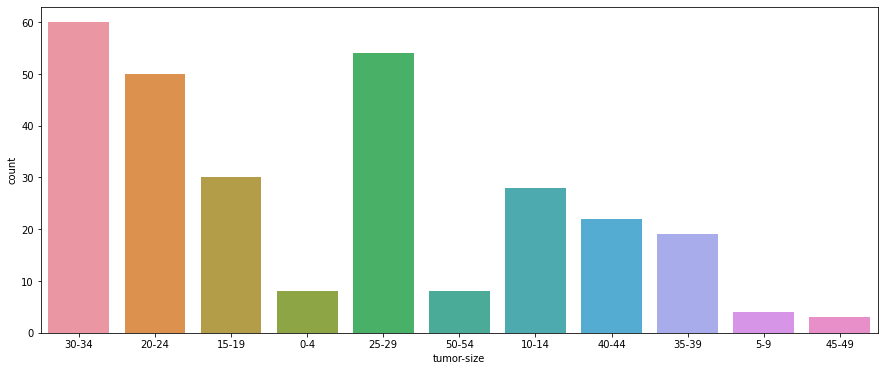

In [20]:
fig, axes = plt.subplots(1,3, figsize=(15,6), sharex=False)
sns.countplot(x = df.columns[0], data = df, ax = axes[0])
sns.countplot(x = df.columns[2], data = df, ax = axes[1])
sns.countplot(x = df.columns[5], data = df, ax = axes[2])

fig, axes = plt.subplots(1,3, figsize=(15,6), sharex=False)
sns.countplot(x = df.columns[8], data = df, ax = axes[0])
sns.countplot(x = df.columns[9], data = df, ax = axes[1])
sns.countplot(x = df.columns[1], data = df, ax = axes[2])

fig, axes = plt.subplots(1,3, figsize=(15,6), sharex=False)
sns.countplot(x = df.columns[6], data = df, ax = axes[0])
sns.countplot(x = df.columns[7], data = df, ax = axes[1])
sns.countplot(x = df.columns[4], data = df, ax = axes[2])

fig, axes = plt.subplots(1,1, figsize=(15,6), sharex=False)
sns.countplot(x = df.columns[3], data = df, ax = axes)

In [21]:
# Biner Tipe Data
df['node-caps']= (df['node-caps']=='yes').astype(int)
df['irradiat']= (df['irradiat']=='yes').astype(int)
df['Class']= (df['Class']=='recurrence-events').astype(int)
df.head()
# Ubah Format Kategori 
df['breast-quad']=df['breast-quad'].astype(object)
quad = {'left_up':1, 'left_low': 2, 'right_up':3, 'right_low':4, 'central':5} 
df= df.replace ({'breast-quad': quad})
df['breast-quad'] = df['breast-quad'].apply(pd.to_numeric, downcast='float', errors='coerce')
df.head()

breast = {'left':1, 'right':2} 
df = df.replace({'breast': breast})
df.head()

menopause = {'premeno':1, 'ge40': 2, 'lt40':3} 
df = df.replace({'menopause': menopause})
df.head()

,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,30-39,1,30-34,0-2,0,3,1,2.0,0
1,0,40-49,1,20-24,0-2,0,2,2,3.0,0
2,0,40-49,1,20-24,0-2,0,2,1,2.0,0
3,0,60-69,2,15-19,0-2,0,2,2,1.0,0
4,0,40-49,1,0-4,0-2,0,2,2,4.0,0


In [22]:
# Missing Value
df[df.isnull().any(axis = 1)]
df = df.dropna()

In [23]:
#Ubah Tipe kategori Range angka ke nilai rata2
nodes = {'0-2':1, '3-5':4,'6-8':7,'9-11':10, '12-14':13,'15-17':16,'18-20':19,'21-23':22,'24-26':25,'27-29':28,'30-32':31,'33-35':34,
        '36-38':37,'39':39}
df = df.replace({'inv-nodes': nodes})
(df['inv-nodes'].describe)

age = {'20-29':24.5, '30-39':34.5,'40-49':44.5,'50-59':54.5, '60-69':64.5,'70-79':74.5,'80-89':84.5,'90-99':94.5}
df= df.replace({'age': age})


Tumor = {'0-4':2, '5-9':7,'10-14':12,'15-19':17, '20-24':22,'25-29':27,'30-34':32,'35-39':37,'40-44':42,'45-49':47,'50-54':52}
df = df.replace({'tumor-size': Tumor})
df.head()


,Class,age,menopause,tumor-size,inv-nodes,node-caps,deg-malig,breast,breast-quad,irradiat
0,0,34.5,1,32,1,0,3,1,2.0,0
1,0,44.5,1,22,1,0,2,2,3.0,0
2,0,44.5,1,22,1,0,2,1,2.0,0
3,0,64.5,2,17,1,0,2,2,1.0,0
4,0,44.5,1,2,1,0,2,2,4.0,0


In [24]:
profile= ProfileReport(df,html={'style':{"full_width":True}})
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [25]:
X = df.drop('Class', axis = 1)
y = df['Class']

In [26]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [27]:
print("Number instances in features_train dataset: ", X_train.shape)
print("Number instances in Output_train dataset: ", y_train.shape)
print("Number instances in features_test dataset: ", X_test.shape)
print("Number instances in Output_test dataset: ", y_test.shape)

Number instances in features_train dataset:  (190, 9)
Number instances in Output_train dataset:  (190,)
Number instances in features_test dataset:  (95, 9)
Number instances in Output_test dataset:  (95,)


In [28]:
print("Sebelum OverSampling, jumlah Recurrent Class '1': {}".format(sum(y_train==1)))
print("Sebelum OverSampling, jumlah No-Recurrent Class '0': {} \n".format(sum(y_train==0)))

Sebelum OverSampling, jumlah Recurrent Class '1': 54
Sebelum OverSampling, jumlah No-Recurrent Class '0': 136 



In [30]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=2)
X_train_res, y_train_res = sm.fit_resample(X_train, y_train)
print('Setelah OverSampling, shape X_train: {}'.format(X_train_res.shape))
print('Seelah OverSampling, shape y_train: {} \n'.format(y_train_res.shape))

print("Setelah OverSampling, Jumlah Recurrent Class '1': {}".format(sum(y_train_res==1)))
print("Setelah OverSampling, jumlah Non-Recurrent Class '0': {}".format(sum(y_train_res==0)))

Setelah OverSampling, shape X_train: (272, 9)
Seelah OverSampling, shape y_train: (272,) 

Setelah OverSampling, Jumlah Recurrent Class '1': 136
Setelah OverSampling, jumlah Non-Recurrent Class '0': 136


In [37]:
#pembuatan model
recurrence_classifier1 = DecisionTreeClassifier(max_leaf_nodes=19, random_state=0)
recurrence_classifier = GaussianNB()

#training data
recurrence_classifier.fit(X_train_res, y_train_res)
recurrence_classifier1.fit(X_train_res, y_train_res)

#Testing

ModelPredictions = recurrence_classifier.predict(X_test)
ModelPredictions1 = recurrence_classifier1.predict(X_test)
print(ModelPredictions[:10])
y_test.head(10)


[0 0 0 0 0 1 1 1 0 1]


9      0
250    1
157    0
210    1
75     0
233    1
265    1
170    0
42     0
226    1
Name: Class, dtype: int64

In [38]:
print("Naive Bayes Accuracy")
accuracy_score(y_true = y_test, y_pred = ModelPredictions)

Naive Bayes Accuracy


0.7578947368421053

In [39]:
confusion_matrix(y_true = y_test, y_pred = ModelPredictions)
print(classification_report(y_true = y_test, y_pred = ModelPredictions))

              precision    recall  f1-score   support

           0       0.80      0.86      0.83        65
           1       0.64      0.53      0.58        30

    accuracy                           0.76        95
   macro avg       0.72      0.70      0.71        95
weighted avg       0.75      0.76      0.75        95

